<a href="https://colab.research.google.com/github/NiteeshR07/sales-analysis-project/blob/main/Sales_Analysis_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

print("✅ Libraries imported!")

✅ Libraries imported!


In [2]:
# ============================================================================
# Cell 2: Generate Sales Data
# ============================================================================

def generate_sales_data(n_records=5000):
    """Generate realistic sales data"""
    print(f"\n📊 Generating {n_records:,} sales records...")

    start_date = datetime(2022, 1, 1)
    dates = [start_date + timedelta(days=x) for x in range(730)]

    products = ['Laptop', 'Desktop', 'Monitor', 'Keyboard', 'Mouse',
                'Printer', 'Tablet', 'Smartphone', 'Headphones', 'Webcam']
    categories = {
        'Laptop': 'Computers', 'Desktop': 'Computers', 'Monitor': 'Accessories',
        'Keyboard': 'Accessories', 'Mouse': 'Accessories', 'Printer': 'Peripherals',
        'Tablet': 'Mobile', 'Smartphone': 'Mobile', 'Headphones': 'Accessories',
        'Webcam': 'Peripherals'
    }

    regions = ['North', 'South', 'East', 'West']
    salespeople = ['Alice Johnson', 'Bob Smith', 'Carol White', 'David Brown',
                   'Emma Davis', 'Frank Miller', 'Grace Wilson', 'Henry Taylor']

    data = []
    for i in range(n_records):
        date = np.random.choice(dates)
        product = np.random.choice(products)
        category = categories[product]
        region = np.random.choice(regions)
        salesperson = np.random.choice(salespeople)

        base_prices = {
            'Laptop': 1200, 'Desktop': 1500, 'Monitor': 300,
            'Keyboard': 80, 'Mouse': 40, 'Printer': 250,
            'Tablet': 500, 'Smartphone': 800, 'Headphones': 150, 'Webcam': 120
        }

        quantity = np.random.randint(1, 10)
        unit_price = base_prices[product] * (1 + np.random.uniform(-0.2, 0.2))

        if date.month in [11, 12]:
            quantity = int(quantity * 1.5)

        total_amount = unit_price * quantity

        if np.random.random() < 0.1:
            if np.random.random() < 0.5:
                unit_price = np.nan
            else:
                quantity = None

        data.append({
            'transaction_id': f'TXN{i+1:06d}',
            'date': date.strftime('%Y-%m-%d'),
            'product': product,
            'category': category,
            'quantity': quantity,
            'unit_price': unit_price,
            'total_amount': total_amount,
            'region': region,
            'salesperson': salesperson,
            'customer_type': np.random.choice(['New', 'Returning'], p=[0.3, 0.7])
        })

    df = pd.DataFrame(data)
    print(f"✅ Generated {len(df):,} records")
    return df

df_raw = generate_sales_data(5000)


📊 Generating 5,000 sales records...
✅ Generated 5,000 records


In [3]:
# ============================================================================
# Cell 3: Clean Data
# ============================================================================

print("\n🧹 CLEANING DATA...")
df = df_raw.copy()

df['date'] = pd.to_datetime(df['date'])
df['unit_price'] = df.groupby('product')['unit_price'].transform(lambda x: x.fillna(x.median()))
df['quantity'] = df['quantity'].fillna(df['quantity'].median())

mask = df['total_amount'].isnull() | (df['total_amount'] == 0)
df.loc[mask, 'total_amount'] = df.loc[mask, 'unit_price'] * df.loc[mask, 'quantity']

df = df.drop_duplicates()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.dayofweek
df['profit_margin'] = df['total_amount'] * 0.25

print(f"✅ Cleaned! Shape: {df.shape}")



🧹 CLEANING DATA...
✅ Cleaned! Shape: (5000, 15)


In [4]:
# ============================================================================
# Cell 4: Summary Statistics
# ============================================================================

print("\n📊 SUMMARY STATISTICS")
print("=" * 60)

total_sales = df['total_amount'].sum()
total_profit = df['profit_margin'].sum()

print(f"\n💰 Overall Metrics:")
print(f"  Total Sales:   ${total_sales:,.2f}")
print(f"  Total Profit:  ${total_profit:,.2f}")
print(f"  Transactions:  {len(df):,}")
print(f"  Avg Transaction: ${df['total_amount'].mean():.2f}")

print(f"\n📦 Top 3 Categories:")
print(df.groupby('category')['total_amount'].sum().sort_values(ascending=False).head(3))

print(f"\n🗺️ Top Region:")
print(df.groupby('region')['total_amount'].sum().sort_values(ascending=False).head(1))


📊 SUMMARY STATISTICS

💰 Overall Metrics:
  Total Sales:   $12,887,234.83
  Total Profit:  $3,221,808.71
  Transactions:  5,000
  Avg Transaction: $2577.45

📦 Top 3 Categories:
category
Computers      7.063851e+06
Mobile         3.293548e+06
Accessories    1.501175e+06
Name: total_amount, dtype: float64

🗺️ Top Region:
region
East    3.623517e+06
Name: total_amount, dtype: float64



📊 Creating Visualizations...


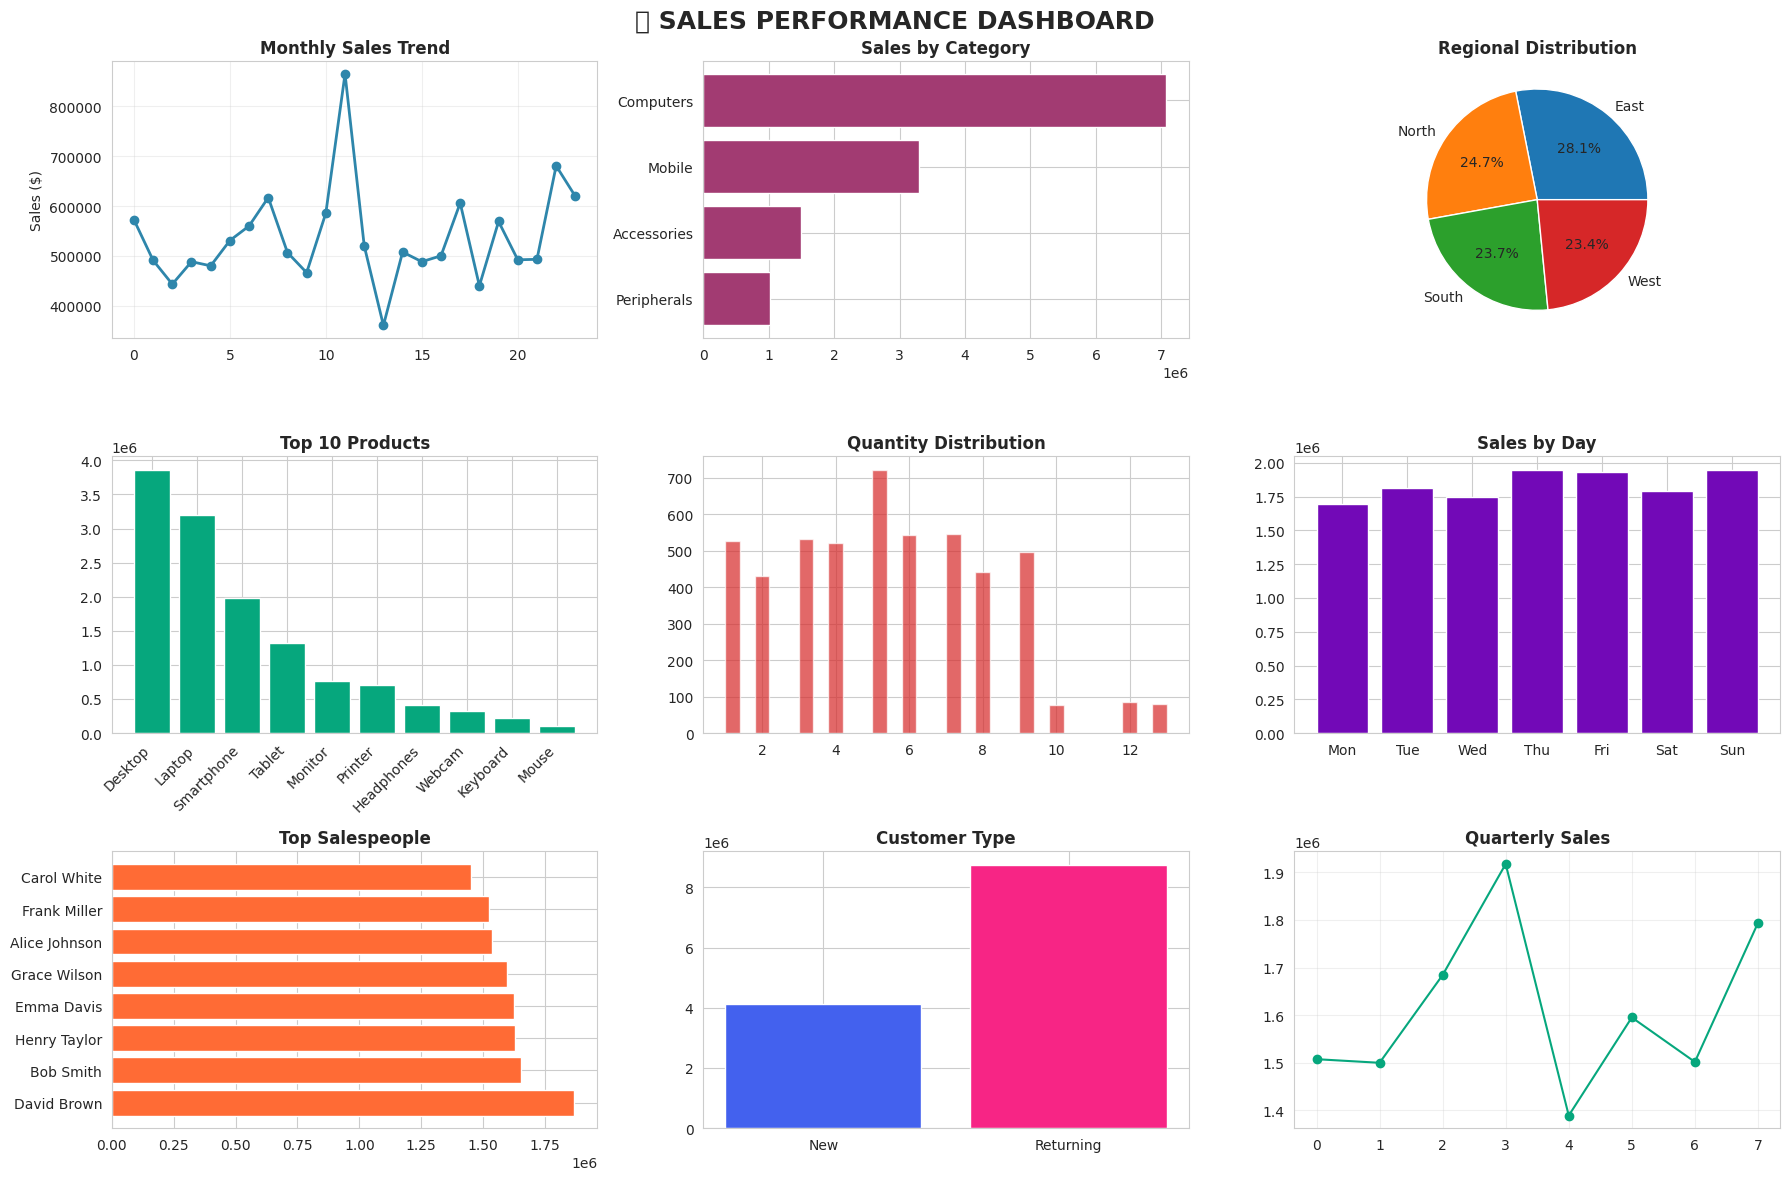

✅ Dashboard complete!


In [5]:
# ============================================================================
# Cell 5: Visualizations
# ============================================================================

print("\n📊 Creating Visualizations...")

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('📊 SALES PERFORMANCE DASHBOARD', fontsize=18, fontweight='bold')

# 1. Monthly Trend
monthly = df.groupby(df['date'].dt.to_period('M'))['total_amount'].sum()
axes[0, 0].plot(range(len(monthly)), monthly.values, marker='o', linewidth=2, color='#2E86AB')
axes[0, 0].set_title('Monthly Sales Trend', fontweight='bold')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].grid(alpha=0.3)

# 2. Sales by Category
cat_sales = df.groupby('category')['total_amount'].sum().sort_values()
axes[0, 1].barh(cat_sales.index, cat_sales.values, color='#A23B72')
axes[0, 1].set_title('Sales by Category', fontweight='bold')

# 3. Regional Distribution
region = df.groupby('region')['total_amount'].sum()
axes[0, 2].pie(region, labels=region.index, autopct='%1.1f%%')
axes[0, 2].set_title('Regional Distribution', fontweight='bold')

# 4. Top Products
top_prod = df.groupby('product')['total_amount'].sum().sort_values(ascending=False).head(10)
axes[1, 0].bar(range(len(top_prod)), top_prod.values, color='#06A77D')
axes[1, 0].set_xticks(range(len(top_prod)))
axes[1, 0].set_xticklabels(top_prod.index, rotation=45, ha='right')
axes[1, 0].set_title('Top 10 Products', fontweight='bold')

# 5. Quantity Distribution
axes[1, 1].hist(df['quantity'], bins=30, color='#D62828', alpha=0.7)
axes[1, 1].set_title('Quantity Distribution', fontweight='bold')

# 6. Day of Week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow = df.groupby('day_of_week')['total_amount'].sum()
axes[1, 2].bar(days, dow.values, color='#7209B7')
axes[1, 2].set_title('Sales by Day', fontweight='bold')

# 7. Top Salespeople
top_sales = df.groupby('salesperson')['total_amount'].sum().sort_values(ascending=False).head(8)
axes[2, 0].barh(range(len(top_sales)), top_sales.values, color='#FF6B35')
axes[2, 0].set_yticks(range(len(top_sales)))
axes[2, 0].set_yticklabels(top_sales.index)
axes[2, 0].set_title('Top Salespeople', fontweight='bold')

# 8. Customer Type
cust = df.groupby('customer_type')['total_amount'].sum()
axes[2, 1].bar(cust.index, cust.values, color=['#4361EE', '#F72585'])
axes[2, 1].set_title('Customer Type', fontweight='bold')

# 9. Quarterly
quarterly = df.groupby(['year', 'quarter'])['total_amount'].sum().reset_index()
quarterly['period'] = quarterly['year'].astype(str) + '-Q' + quarterly['quarter'].astype(str)
axes[2, 2].plot(range(len(quarterly)), quarterly['total_amount'], marker='o', color='#06A77D')
axes[2, 2].set_title('Quarterly Sales', fontweight='bold')
axes[2, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Dashboard complete!")


In [6]:
# ============================================================================
# Cell 6: Prepare ML Data
# ============================================================================

print("\n🤖 PREPARING ML DATA...")

daily = df.groupby('date').agg({
    'total_amount': 'sum',
    'quantity': 'sum',
    'transaction_id': 'count'
}).reset_index()
daily.columns = ['date', 'total_sales', 'total_quantity', 'num_transactions']

daily['day_of_week'] = daily['date'].dt.dayofweek
daily['month'] = daily['date'].dt.month
daily['quarter'] = daily['date'].dt.quarter
daily['day_of_year'] = daily['date'].dt.dayofyear
daily['is_weekend'] = daily['day_of_week'].isin([5, 6]).astype(int)
daily['is_holiday_season'] = daily['month'].isin([11, 12]).astype(int)

daily = daily.sort_values('date')
daily['sales_lag_1'] = daily['total_sales'].shift(1)
daily['sales_lag_7'] = daily['total_sales'].shift(7)
daily['sales_rolling_7'] = daily['total_sales'].rolling(window=7).mean()
daily['sales_rolling_30'] = daily['total_sales'].rolling(window=30).mean()

daily = daily.dropna()
print(f"✅ Prepared {len(daily)} daily records")



🤖 PREPARING ML DATA...
✅ Prepared 699 daily records


In [7]:
# ============================================================================
# Cell 7: Train Models
# ============================================================================

print("\n🎯 TRAINING MODELS...")

feature_cols = ['day_of_week', 'month', 'quarter', 'day_of_year',
                'is_weekend', 'is_holiday_season', 'total_quantity',
                'num_transactions', 'sales_lag_1', 'sales_lag_7',
                'sales_rolling_7', 'sales_rolling_30']

X = daily[feature_cols]
y = daily['total_sales']

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("✅ Models trained!")

print("\n📊 MODEL PERFORMANCE:")
for name, pred in [('Linear Regression', lr_pred), ('Random Forest', rf_pred)]:
    print(f"\n{name}:")
    print(f"  RMSE: ${np.sqrt(mean_squared_error(y_test, pred)):,.2f}")
    print(f"  R²:   {r2_score(y_test, pred):.4f}")



🎯 TRAINING MODELS...
✅ Models trained!

📊 MODEL PERFORMANCE:

Linear Regression:
  RMSE: $7,721.76
  R²:   0.4998

Random Forest:
  RMSE: $8,078.74
  R²:   0.4525



📊 Creating Prediction Visualizations...


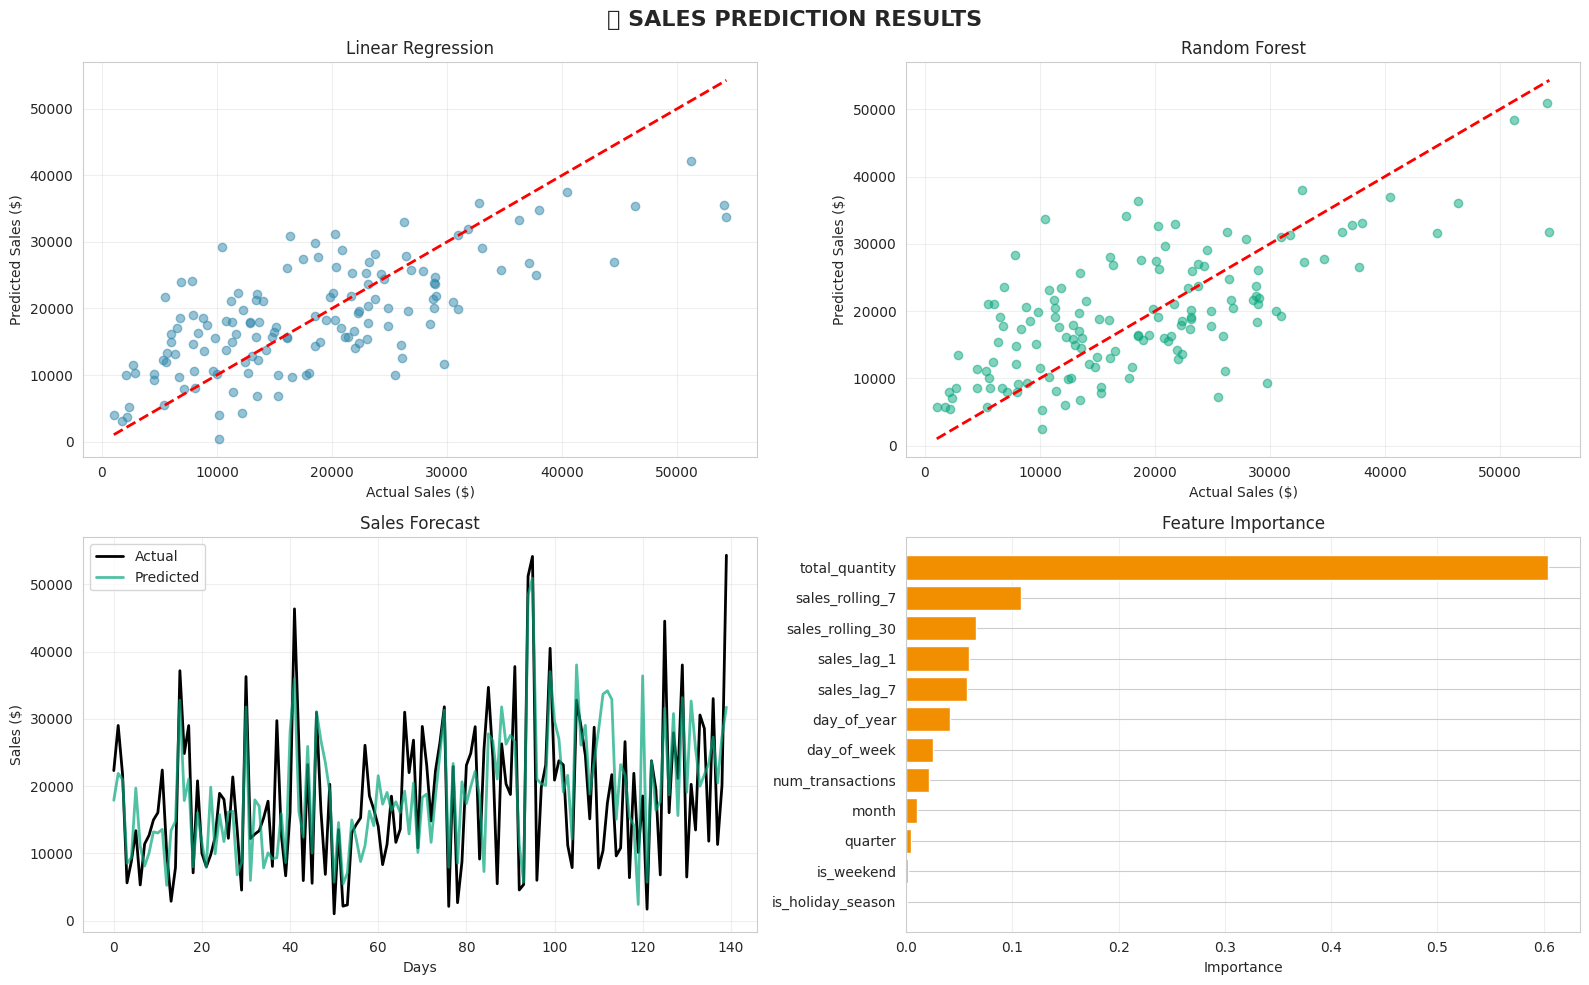

✅ Predictions visualized!


In [8]:
# ============================================================================
# Cell 8: Prediction Visualizations
# ============================================================================

print("\n📊 Creating Prediction Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('🤖 SALES PREDICTION RESULTS', fontsize=16, fontweight='bold')

# Actual vs Predicted (LR)
axes[0, 0].scatter(y_test, lr_pred, alpha=0.5, color='#2E86AB')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Sales ($)')
axes[0, 0].set_ylabel('Predicted Sales ($)')
axes[0, 0].set_title('Linear Regression')
axes[0, 0].grid(alpha=0.3)

# Actual vs Predicted (RF)
axes[0, 1].scatter(y_test, rf_pred, alpha=0.5, color='#06A77D')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Sales ($)')
axes[0, 1].set_ylabel('Predicted Sales ($)')
axes[0, 1].set_title('Random Forest')
axes[0, 1].grid(alpha=0.3)

# Time Series
test_dates = daily['date'].iloc[split_idx:]
axes[1, 0].plot(range(len(y_test)), y_test.values, label='Actual', linewidth=2, color='black')
axes[1, 0].plot(range(len(rf_pred)), rf_pred, label='Predicted', linewidth=2, color='#06A77D', alpha=0.7)
axes[1, 0].set_xlabel('Days')
axes[1, 0].set_ylabel('Sales ($)')
axes[1, 0].set_title('Sales Forecast')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Feature Importance
importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[1, 1].barh(importance['feature'], importance['importance'], color='#F18F01')
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Feature Importance')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Predictions visualized!")

In [9]:
# ============================================================================
# Cell 9: Final Summary
# ============================================================================

print("\n" + "="*70)
print("🎉 SALES ANALYSIS COMPLETE!")
print("="*70)

print("\n📊 KEY INSIGHTS:")
print(f"\n1. Total Revenue: ${df['total_amount'].sum():,.2f}")
print(f"2. Best Category: {df.groupby('category')['total_amount'].sum().idxmax()}")
print(f"3. Best Region: {df.groupby('region')['total_amount'].sum().idxmax()}")
print(f"4. Best Model: Random Forest (R²={r2_score(y_test, rf_pred):.3f})")

print("\n💡 RECOMMENDATIONS:")
print("  • Focus on high-performing categories")
print("  • Replicate successful region strategies")
print("  • Invest in customer retention (70% revenue)")
print("  • Prepare for Q4 seasonal boost")

print("\n" + "="*70)


🎉 SALES ANALYSIS COMPLETE!

📊 KEY INSIGHTS:

1. Total Revenue: $12,887,234.83
2. Best Category: Computers
3. Best Region: East
4. Best Model: Random Forest (R²=0.452)

💡 RECOMMENDATIONS:
  • Focus on high-performing categories
  • Replicate successful region strategies
  • Invest in customer retention (70% revenue)
  • Prepare for Q4 seasonal boost

